In [2]:
# -*- coding: utf-8 -*-
# Create time: 2025-09-29
# Update time: 2025-11-27

import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scanpy as sc
import matplotlib as mpl
plt.rcParams['svg.fonttype'] = 'none'
sc._settings.settings._vector_friendly=True # 这个设置可以让umap的点为图片，但是分辨率很低，需要跟jpg结合使用

cm_to_inch = 1/2.54


def compare_two_models_umap(adata1, adata2, adata3, title1, title2, title3, figsize, save_dir):
    """
    比较三个模型的UMAP图
    
    Parameters:
    -----------
    adata1 : AnnData
        第一个adata
    adata2 : AnnData  
        第二个adata
    adata3 : AnnData
        第三个adata
    title1 : str
        第一个模型的标题
    title2 : str
        第二个模型的标题
    title3 : str
        第三个模型的标题
    figsize : tuple
        图片大小
    save_path : str
        保存路径
    """
    
    # 获取配色方案（从第一个adata获取）
    celltype_categories = adata1.obs['cell_type'].cat.categories
    batch_categories = adata1.obs['donor_id'].cat.categories

    celltype_palette = dict(zip(celltype_categories, adata1.uns['cell_type_colors']))
    batch_palette = dict(zip(batch_categories, adata1.uns['donor_id_colors']))
    
    # 全局字体设置
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 6
    
    # 布局参数
    fig = plt.figure(figsize=figsize)
    
    # 创建网格布局（2行3列）
    gs = gridspec.GridSpec(2, 3, figure=fig, 
                          hspace=0, wspace=0.1)
    
    obs_columns = ["cell_type", "donor_id"]
    adatas = [adata1, adata2, adata3]
    titles = [title1, title2, title3]
    
    # 绘制UMAP子图
    for col, (adata, title) in enumerate(zip(adatas, titles)):
        for row, col_name in enumerate(obs_columns):
            ax = fig.add_subplot(gs[row, col])
            palette = celltype_palette if col_name == "cell_type" else batch_palette
            
            sc.pl.umap(
                adata,
                color=col_name,
                show=False,
                ax=ax,
                legend_loc=None,
                frameon=False,
                palette=palette,
                title="",
                s=0.3  # 点的大小
            )
            
            # 设置标题（只在第一行设置）
            if row == 0:
                ax.set_title(title, fontsize=6)
    
    # 在左侧添加行标签
    fig.text(0.1, 0.75, 'Cell Type', ha='left', va='center', rotation=90)
    fig.text(0.1, 0.5, 'Donor', ha='left', va='center', rotation=90)

    # 添加标题
    fig.text(0.4, 1.02, "Geneformer", ha='center', va='top', fontsize=7, fontweight='bold')
    fig.text(0.78, 1.02, "Harmony", ha='center', va='top', fontsize=7, fontweight='bold')

    
    # 调整子图布局，为图例留出空间
    plt.subplots_adjust(bottom=0.35)
    
    # 创建图例
    # Celltype图例
    # celltype_handles = [plt.Line2D([0], [0], marker='o', color='w', 
    #                               markerfacecolor=celltype_palette[ct], markersize=4, alpha=0.9)
    #                    for ct in celltype_categories]
    # celltype_legend = fig.legend(celltype_handles, celltype_categories, title="", 
    #                             loc='upper center', bbox_to_anchor=(0.5, 0.35),
    #                             fontsize=5, title_fontsize=6,
    #                             frameon=False, 
    #                             ncol=4, columnspacing=0.3, handletextpad=0.2)
    sorted_celltype_categories = sorted(celltype_categories, key=len)
    celltype_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                                  markerfacecolor=celltype_palette[ct], markersize=5, alpha=0.9)
                       for ct in sorted_celltype_categories]
    celltype_legend = fig.legend(celltype_handles, sorted_celltype_categories, title="", 
                                loc='upper center', bbox_to_anchor=(0.5, 0.35),
                                fontsize=6,
                                frameon=False, 
                                ncol=4, columnspacing=0, handletextpad=0)

    # Batch图例
    batch_handles = [plt.Line2D([0], [0], marker='o', color='w',
                               markerfacecolor=batch_palette[batch], markersize=5, alpha=0.9)
                    for batch in batch_categories]
    batch_legend = fig.legend(batch_handles, batch_categories, title="", 
                             loc='upper center', bbox_to_anchor=(0.5, 0.15),
                             fontsize=6,
                             frameon=False,
                             ncol=8, columnspacing=0, handletextpad=0)

    # 保存图像
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(os.path.join(save_dir, "Figure2F_umap_compare.pdf"), dpi=600, bbox_inches="tight")
        plt.savefig(os.path.join(save_dir, "Figure2F_umap_compare.svg"), dpi=600, bbox_inches="tight")
        plt.savefig(os.path.join(save_dir, "Figure2F_umap_compare.jpg"), dpi=600, bbox_inches="tight")


    plt.show()

In [3]:
# 读取数据
adata_path1 = "/home/wanglinting/scFM/Result/liver/geneformer/Embeddings_geneformer.h5ad"
adata_path2 = "/home/wanglinting/scFM/Result/liver_batch_normalize/geneformer/Embeddings_geneformer.h5ad"
adata_path3 = "/home/wanglinting/scFM/Result/liver/harmony/Embeddings_harmony.h5ad"
adata1 = sc.read(adata_path1, backed='r')
adata2 = sc.read(adata_path2, backed='r')
adata3 = sc.read(adata_path3, backed='r')

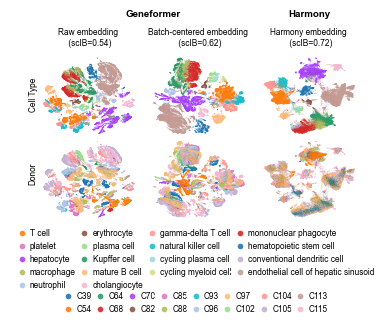

In [5]:
compare_two_models_umap(
    adata1=adata1,
    adata2=adata2,
    adata3=adata3,
    title1="Raw embedding \n (scIB=0.54)",
    title2="Batch-centered embedding \n (scIB=0.62)",
    title3="Harmony embedding \n (scIB=0.72)",
    figsize=(10.5*cm_to_inch, 8*cm_to_inch),
    save_dir="/home/wanglinting/scFM/Result/figure",
)